<a href="https://colab.research.google.com/github/oasquared/DDDS-Cohort-16-Projects/blob/main/Copy_of_Housing_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


## Import Libraries & Read in Data

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"
house = pd.read_csv(url)
house.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
house.shape

(2637, 81)

In [ ]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [ ]:
# Check to see if there are any NA values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
# Check NA and Dtype
missing_values=house.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_dtypes = house.dtypes[missing_columns.index]
missing_info = pd.DataFrame({'Missing Count': missing_columns, 'Dtype': missing_dtypes})
print(missing_info)

                Missing Count    Dtype
Lot Frontage              449  float64
Alley                    2457   object
Mas Vnr Type             1607   object
Mas Vnr Area               23  float64
Bsmt Qual                  73   object
Bsmt Cond                  73   object
Bsmt Exposure              76   object
BsmtFin Type 1             73   object
BsmtFin SF 1                1  float64
BsmtFin Type 2             74   object
BsmtFin SF 2                1  float64
Bsmt Unf SF                 1  float64
Total Bsmt SF               1  float64
Bsmt Full Bath              2  float64
Bsmt Half Bath              2  float64
Fireplace Qu             1284   object
Garage Type               145   object
Garage Yr Blt             147  float64
Garage Finish             147   object
Garage Cars                 1  float64
Garage Area                 1  float64
Garage Qual               147   object
Garage Cond               147   object
Pool QC                  2626   object
Fence                    

In [ ]:
# Columns with NA
missing_info1=missing_info.transpose()
missing_info1
missing_info1.describe().columns

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [ ]:
house_clean = house.copy()

In [ ]:
# Drop NA with Dtype Object(Discrete and normial)
house_clean=house_clean.drop(columns=[ 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'])

In [ ]:
# Drop the rows of the with One NA
house_clean = house_clean.dropna(subset=['Total Bsmt SF','Garage Area'])

In [ ]:
house['Lot Frontage'].mean()
house_clean['Lot Frontage'].fillna(house['Lot Frontage'].mean(), inplace=True)

<ipython-input-78-ebae4e921844>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_clean['Lot Frontage'].fillna(house['Lot Frontage'].mean(), inplace=True)


In [ ]:
#Check left NA and Dtype
missing_values=house_clean.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_dtypes = house.dtypes[missing_columns.index]
missing_info = pd.DataFrame({'Missing Count': missing_columns, 'Dtype': missing_dtypes})
print(missing_info)

Empty DataFrame
Columns: [Missing Count, Dtype]
Index: []


In [ ]:
house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2635 entries, 0 to 2636
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2635 non-null   int64  
 1   MS SubClass      2635 non-null   int64  
 2   MS Zoning        2635 non-null   object 
 3   Lot Frontage     2635 non-null   float64
 4   Lot Area         2635 non-null   int64  
 5   Street           2635 non-null   object 
 6   Lot Shape        2635 non-null   object 
 7   Land Contour     2635 non-null   object 
 8   Utilities        2635 non-null   object 
 9   Lot Config       2635 non-null   object 
 10  Land Slope       2635 non-null   object 
 11  Neighborhood     2635 non-null   object 
 12  Condition 1      2635 non-null   object 
 13  Condition 2      2635 non-null   object 
 14  Bldg Type        2635 non-null   object 
 15  House Style      2635 non-null   object 
 16  Overall Qual     2635 non-null   int64  
 17  Overall Cond     26

In [ ]:
house_clean.shape

(2635, 58)

In [ ]:
# Select categorical columns (dtype 'object')
categorical_cols = house_clean.select_dtypes(include=['object']).columns
# One-hot encode categorical columns
house_encoded = pd.get_dummies(house_clean, columns=categorical_cols, drop_first=True)

In [ ]:

categorical_cols.shape

(28,)

In [ ]:
house_encoded.shape

(2635, 199)

In [ ]:
# Excluding Dtype(Object) for Correlation and plot
numerical_cols = house_clean[house_clean.select_dtypes(exclude=['object']).columns]
numerical_cols

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,1005.0,1005,...,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,1296,...,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,780.0,780,...,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,975.0,975,...,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,560.0,575,...,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,52.0,6240,6,6,1934,1950,816.0,816,...,112,0,0,0,0,0,400,9,2006,114500
2633,906201021,80,74.0,10778,7,6,1990,1991,1054.0,1061,...,114,36,0,0,0,0,0,7,2009,162000
2634,533253070,120,61.0,3782,8,5,1981,1981,1226.0,1226,...,133,78,0,0,0,0,0,9,2009,211500
2635,527376100,20,78.0,10140,6,5,1974,1974,1064.0,1350,...,0,0,0,0,0,0,0,8,2009,165000


In [ ]:
house_encoded=house_encoded.drop(columns=['PID'])

In [ ]:
house_encoded_bakup=house_encoded.copy()

In [ ]:
numerical_cols.shape

(2635, 30)

## EDA

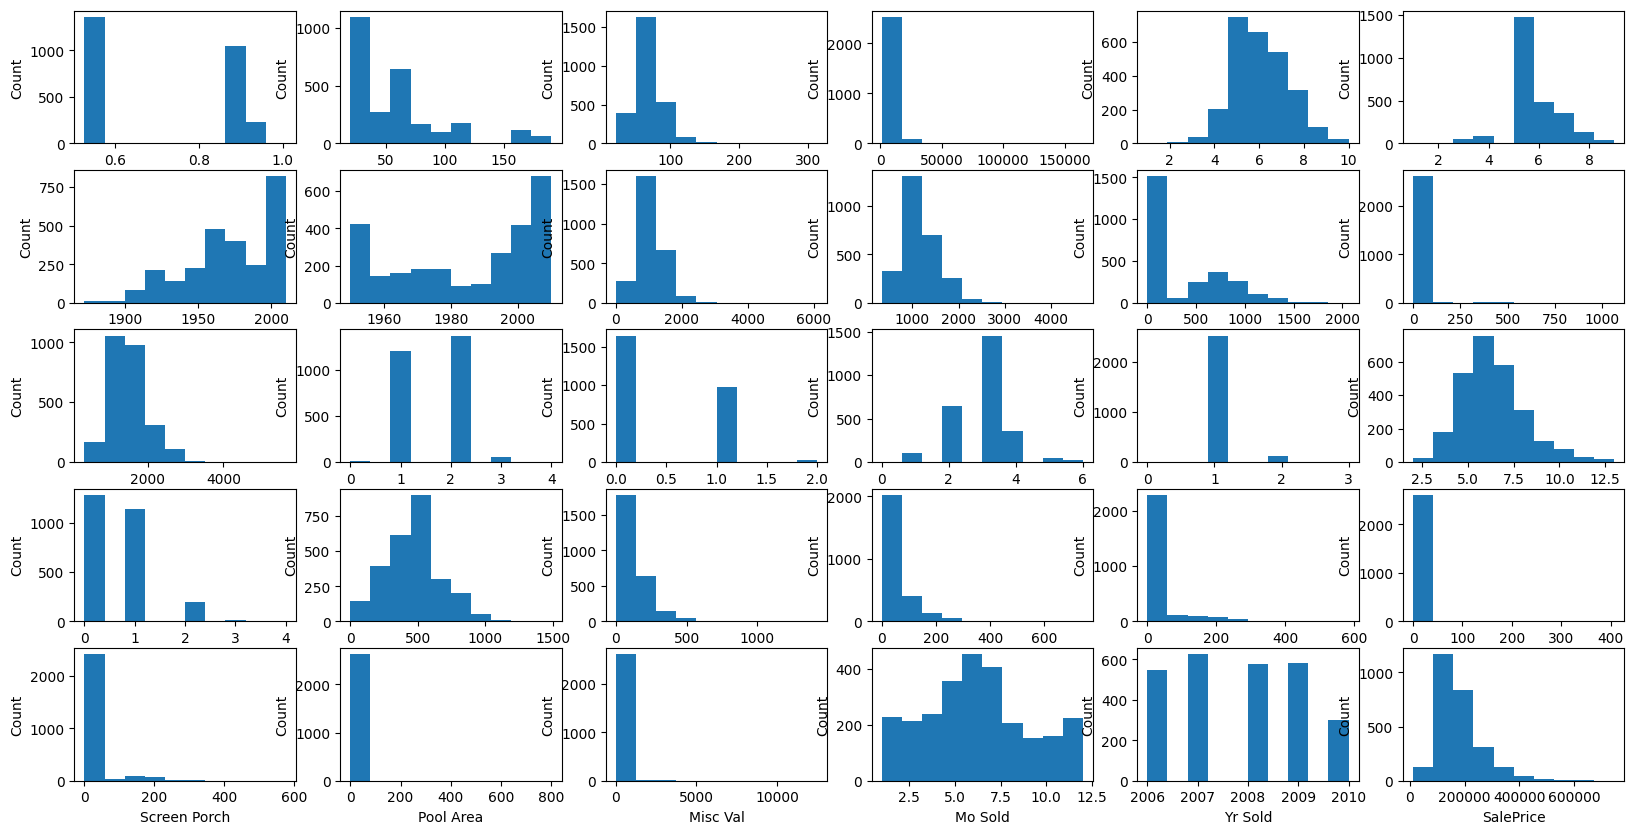

In [ ]:
# Let's plot Saleprice and all of our predictors
fig, axs = plt.subplots(5,6, figsize = (20,10)) # Creating 2x4 subplots because we have 8 columns in our data
column_names = numerical_cols.columns
n = 0
for i in range(5): # Loop through rows
  for j in range(6): # Loop through columns
    axs[i,j].hist(numerical_cols[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

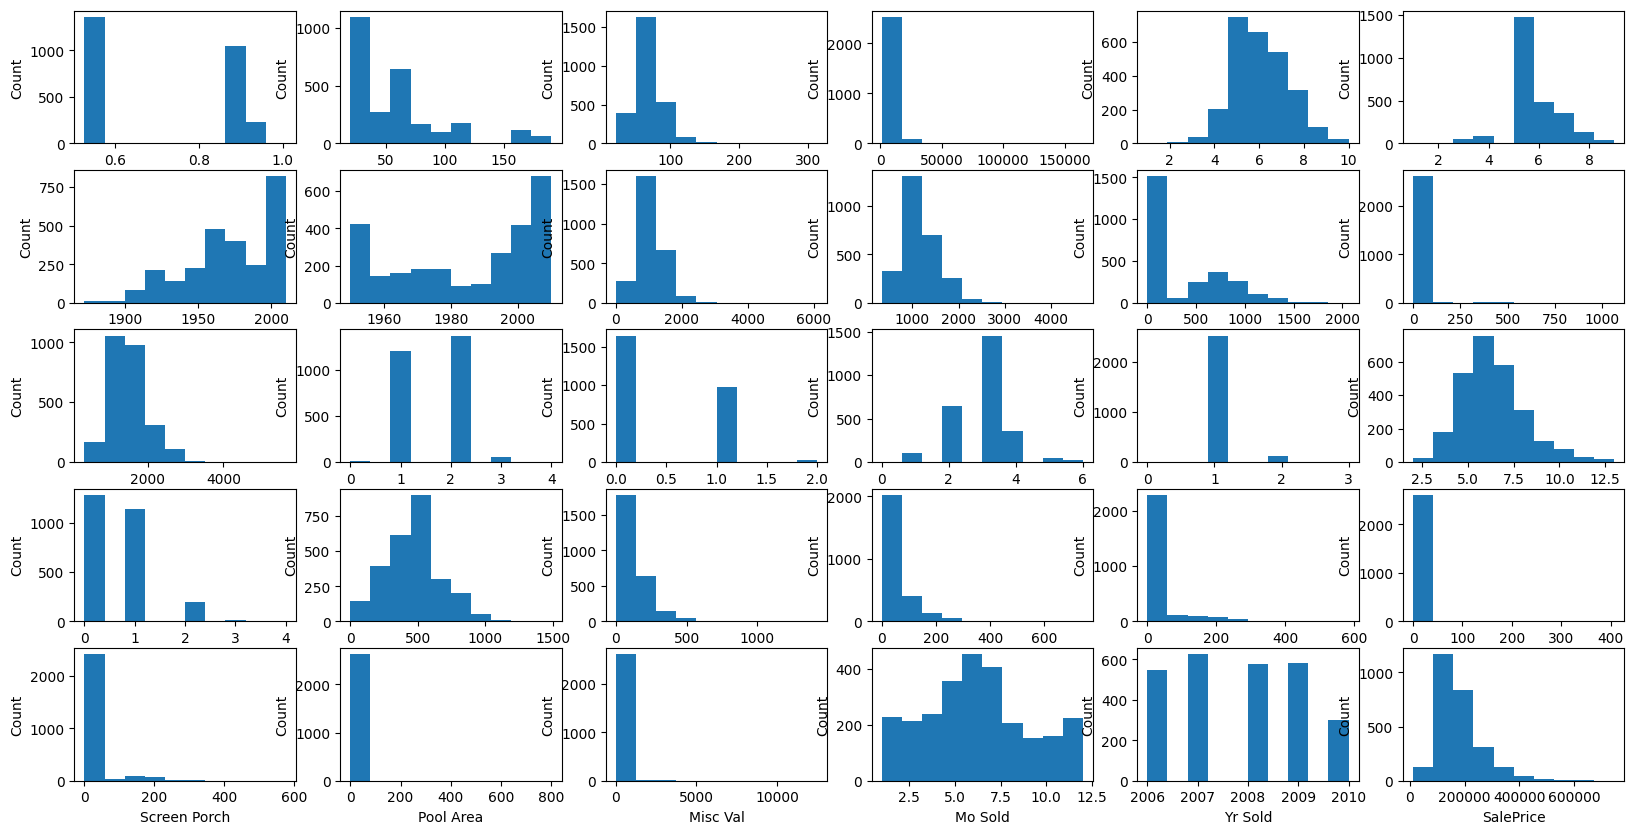

In [ ]:
# Let's plot Salesprice and all of our predictors
fig, subplots = plt.subplots(5,6, figsize = (20,10)) # Creating 2x4 subplots because we have 8 columns in our data
column_names = numerical_cols.columns

subplots = subplots.flatten()[:len(column_names)]  # flatten and slice axs
for n, subplot in enumerate(subplots):             # Loop through axs
  subplot.hist(numerical_cols[column_names[n]])
  subplot.set_xlabel(column_names[n])
  subplot.set_ylabel('Count')

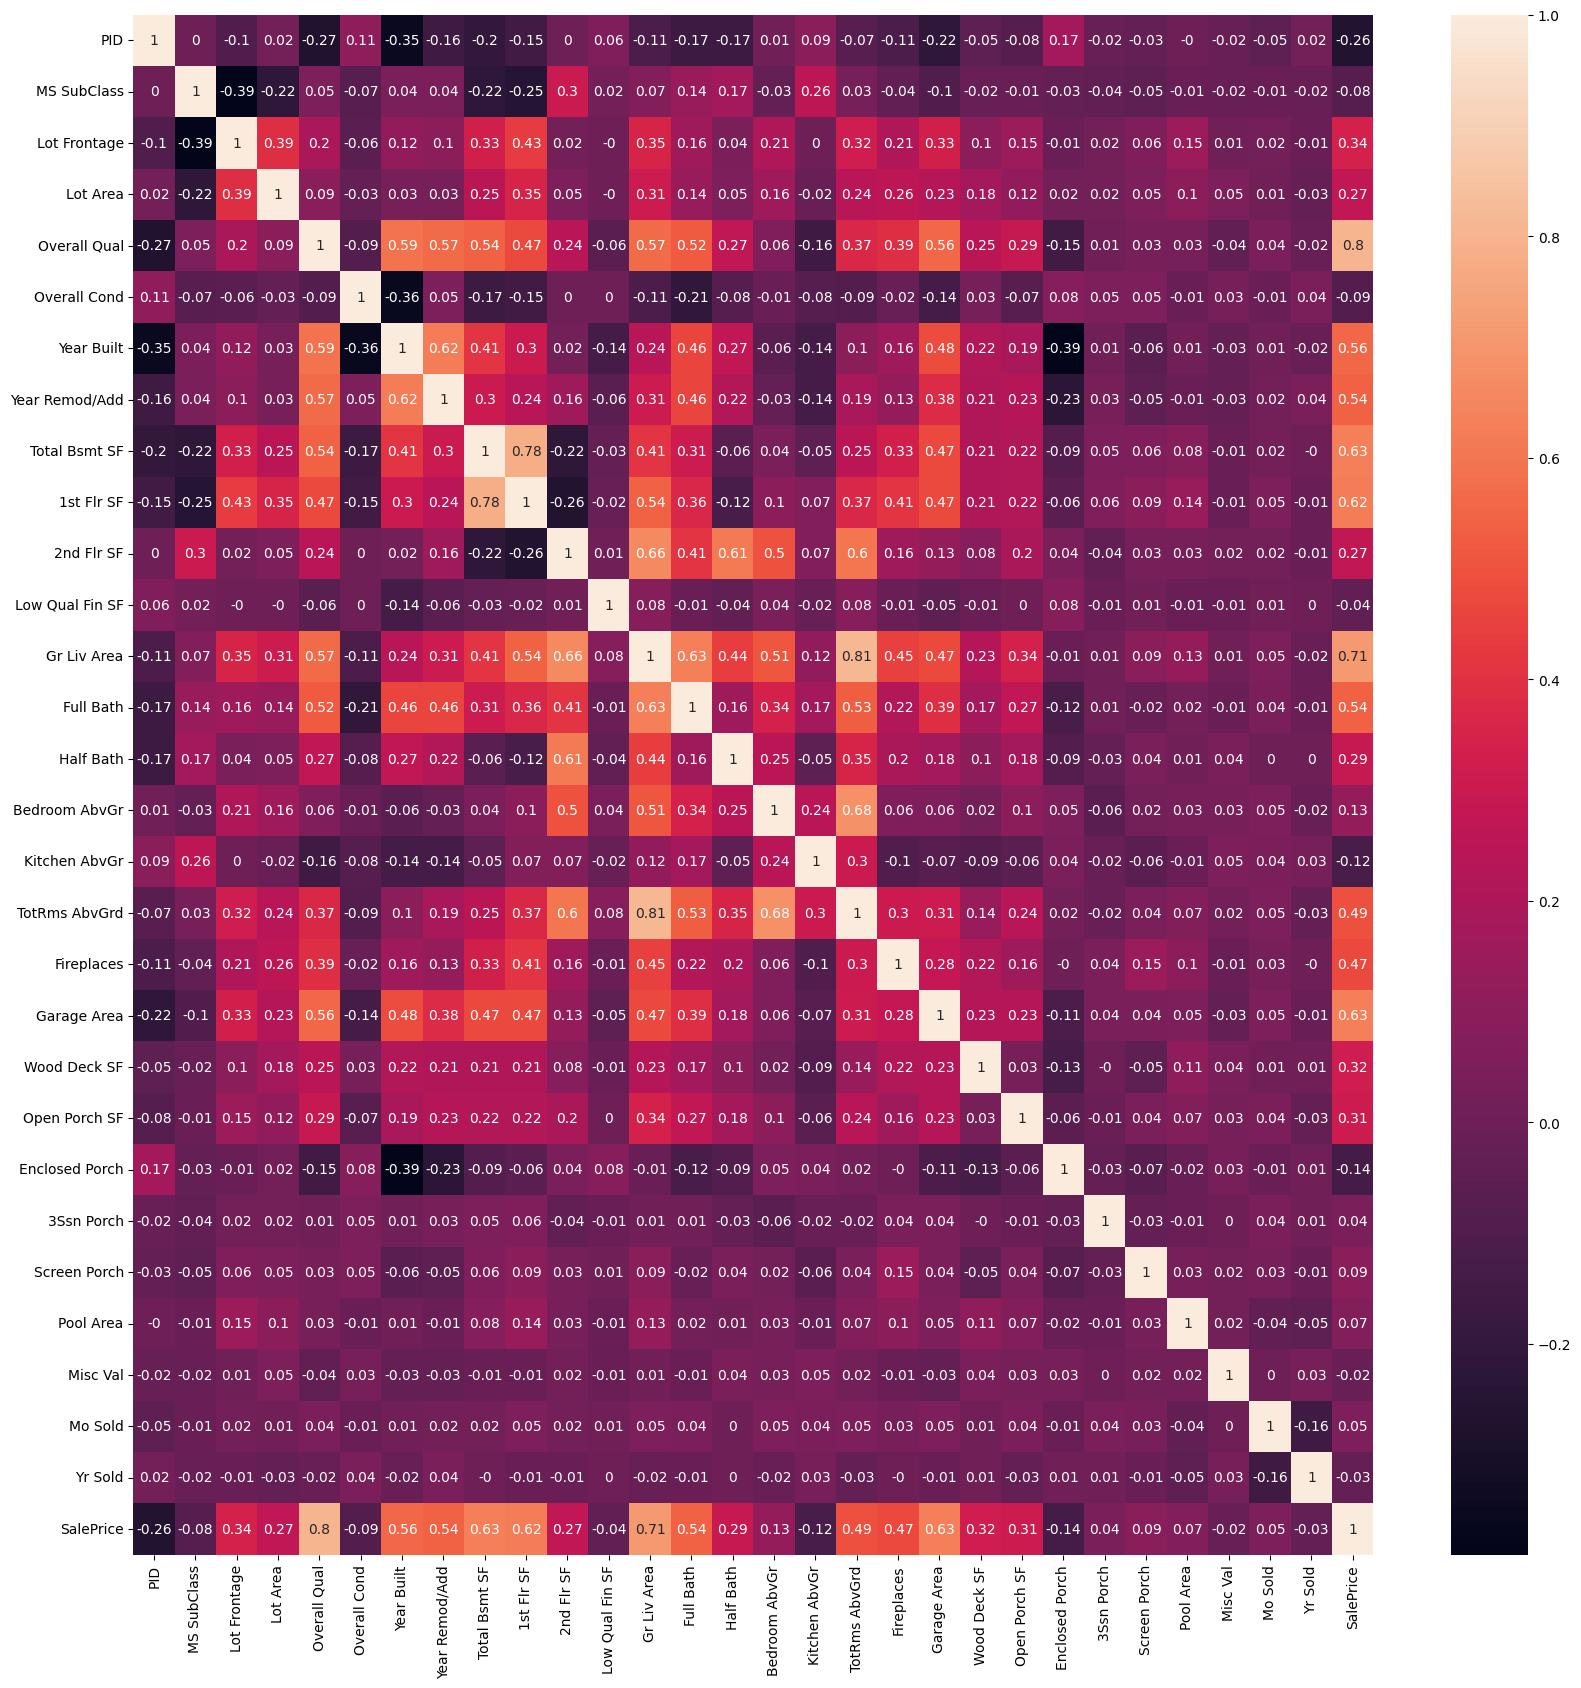

In [ ]:
# Let's take a look at a correlation plot
plt.figure(figsize=(20,20))
correlation_matrix = numerical_cols.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

In [ ]:
numerical_cols.corr()['SalePrice'].abs().sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.804884
Gr Liv Area,0.705480
Garage Area,0.633758
Total Bsmt SF,0.628646
1st Flr SF,0.618138
Year Built,0.562681
Full Bath,0.542359
Year Remod/Add,0.539741
TotRms AbvGrd,0.493454


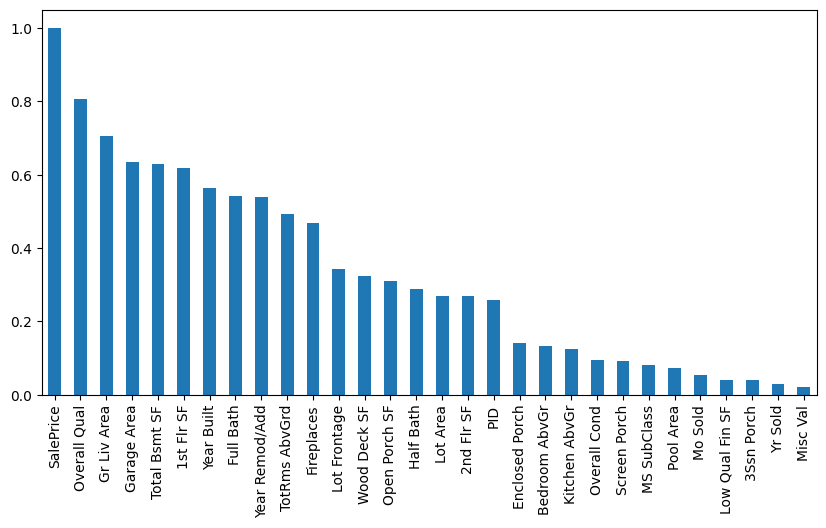

In [ ]:
numerical_cols.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5)) ;

In [ ]:
# Let's plot a pairplot
#sns.pairplot(numerical_cols) ;

In [ ]:
house_numerical=numerical_cols.drop(columns=['PID','MS SubClass','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Mo Sold', 'Yr Sold','Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces'])
house_numerical_bakup=house_numerical.copy()


# OLS

In [ ]:
# Separate predictors (X) and target variable (y)
X = house_numerical_bakup.drop(columns=['SalePrice'])
y = house_numerical_bakup['SalePrice']
X = sm.add_constant(X) # add constant so that intercept is estimated
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Lasso is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using LASSO

In [ ]:
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Print the feature importance
print("Feature Coefficients:\n", lasso_coefficients)

Feature Coefficients:
 const                  0.000000
Lot Frontage       -1175.048291
Lot Area            -685.181176
Total Bsmt SF      22409.640190
1st Flr SF         21604.630211
2nd Flr SF         24367.272809
Low Qual Fin SF    -1491.929513
Gr Liv Area         4896.235190
Garage Area        19554.675251
Wood Deck SF        8311.599232
Open Porch SF       3091.736833
Enclosed Porch     -4751.028790
3Ssn Porch           783.297197
Screen Porch        2335.923370
Pool Area          -4890.822517
Misc Val           -1419.193442
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+09, tolerance: 1.244e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Keep only features with non-zero coefficients
selected_features = lasso_coefficients[lasso_coefficients != 0].index

# Create reduced dataset
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

print("Selected Features:", list(selected_features))

Selected Features: ['Lot Frontage', 'Lot Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']


In [ ]:
# Use cross-validation to find the best alpha
lasso_cv = LassoCV(cv=5, alphas=np.logspace(-3, 1, 10000)).fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = lasso_cv.alpha_
print("Optimal Alpha:", best_alpha)

# Re-train Lasso with best alpha
lasso_best = Lasso(alpha=best_alpha).fit(X_train_scaled, y_train)

# Get final selected features
selected_features = X.columns[lasso_best.coef_ !=0]
print("Final Selected Features:", list(selected_features))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3920060509.451172, tolerance: 996198255.2837313
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3877127708.904297, tolerance: 996198255.2837313
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3834312945.291504, tolerance: 996198255.2837313
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWar

Optimal Alpha: 9.826508630517555
Final Selected Features: ['Lot Frontage', 'Lot Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.435e+09, tolerance: 1.244e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.435e+09, tolerance: 1.244e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
selected_features

Index(['Lot Frontage', 'Lot Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val'],
      dtype='object')

In [ ]:
#numerical_cols[selected_features].corr()['SalePrice'].abs().sort_values(ascending = False)

## Fit & Assess Our Model

### Using Statsmodels

In [ ]:
X_train_reduced = sm.add_constant(X_train_reduced)
full_fit = sm.OLS(y_train, X_train_reduced).fit()
full_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     341.2
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:34:26   Log-Likelihood:                -25452.
No. Observations:                2108   AIC:                         5.093e+04
Df Residuals:                    2093   BIC:                         5.102e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.991e+04   3892.856     -5.114      0.000   -2.75e+04   -1.23e+04
Lot Frontage      -54.6663     50.455     -1.083      0.279    -153.613      44.281
Lot Area           -0.0979      0.150     -0.654      0.513      -0.391       0.196
Total Bsmt SF      52.3183      3.503     14.937      0.000      45.449      59.187
1st Flr SF         39.1111      6.108      6.404      0.000      27.134      51.089
2nd Flr SF         38.9900      5.507      7.080      0.000      28.189      49.791
Low Qual Fin SF   -50.6891     15.623     -3.244      0.001     -81.328     -20.050
Gr Liv Area        27.4120      5.313      5.159      0.000      16.992      37.832
Garage Area        92.2346      5.466     16.875      0.000      81.516     102.953
Wood Deck SF       65.2841      7.780      8.391      0.000      50.026      80.542
Open Porch SF      47.2101     15.344      3.077      0.002      17.119      77.301
Enclosed Porch    -77.1879     15.416     -5.007      0.000    -107.420     -46.955
3Ssn Porch         32.0727     38.094      0.842      0.400     -42.634     106.779
Screen Porch       42.2477     17.017      2.483      0.013       8.876      75.620
Pool Area        -130.8133     25.406     -5.149      0.000    -180.636     -80.990
Misc Val           -3.4129      2.239     -1.524      0.128      -7.805       0.979
==============================================================================
Omnibus:                      830.823   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47190.741
Skew:                          -1.048   Prob(JB):                         0.00
Kurtosis:                      26.084   Cond. No.                     1.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.89e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Using Sklearn

In [ ]:
# First we will break up our data into training and testing sets
X = house_numerical_bakup.drop(columns=['SalePrice'])
y = numerical_cols['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )

(np.float64(-24103.500841136294),
 array([ -0.65392049,  -0.17250172,  51.85290452,  37.80854026,
         38.01508783, -44.88744625,  30.93618185,  90.44540857,
         60.79639707,  27.71238738, -82.61388528,  58.8968252 ,
         30.59389478, -85.75983006,  -2.58901853]))

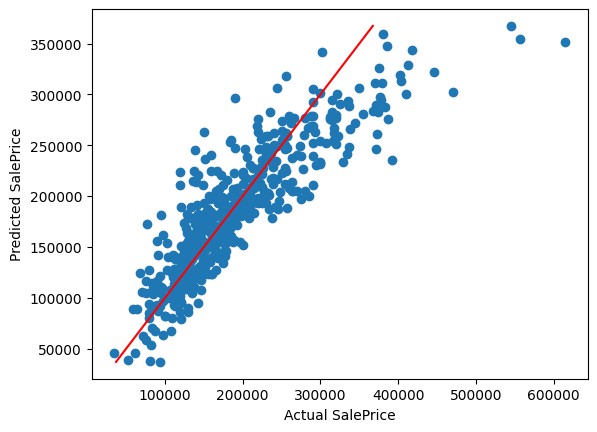

In [ ]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [ ]:
list(zip(y_test,y_pred))[:10]

[(112000, np.float64(109985.87448055405)),
 (316500, np.float64(253927.51569748958)),
 (163990, np.float64(148324.86039775927)),
 (132000, np.float64(134775.6176920251)),
 (105000, np.float64(99818.10822526687)),
 (124500, np.float64(125374.90840651523)),
 (201800, np.float64(202420.80901368344)),
 (235128, np.float64(240057.08439589178)),
 (312500, np.float64(278211.8526322056)),
 (219500, np.float64(263424.80691426515))]

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 41017.93001679396


In [ ]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 43116.37974139201


#### Repeat, but this time scale the features using the StandardScaler ( Z-score ).

In [ ]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=4)

In [ ]:
X

,Lot Frontage,Lot Area,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,62.0,14299,1005.0,1005,0,0,1005,440.0,0,0,0,0,0,0,0
1,72.0,10791,0.0,1296,0,0,1296,516.0,0,0,0,0,0,0,500
2,50.0,9000,780.0,780,595,0,1375,544.0,0,162,0,0,126,0,0
3,68.0,7379,975.0,975,873,0,1848,592.0,280,184,0,0,0,0,0
4,60.0,7200,560.0,575,560,0,1135,576.0,256,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,6240,816.0,816,0,360,1176,528.0,112,0,0,0,0,0,400
2633,74.0,10778,1054.0,1061,0,0,1061,462.0,114,36,0,0,0,0,0
2634,61.0,3782,1226.0,1226,0,0,1226,484.0,133,78,0,0,0,0,0
2635,78.0,10140,1064.0,1350,0,0,1350,478.0,0,0,0,0,0,0,0


In [ ]:
X_scaled

array([[-0.33679296,  0.6306047 , -0.09367571, ..., -0.2829602 ,
        -0.06065108, -0.10692404],
       [ 0.13340629,  0.11038673, -2.43267584, ..., -0.2829602 ,
        -0.06065108,  1.16459103],
       [-0.90103207, -0.15520917, -0.61733246, ...,  1.97540215,
        -0.06065108, -0.10692404],
       ...,
       [-0.38381289, -0.92901116,  0.42067158, ..., -0.2829602 ,
        -0.06065108, -0.10692404],
       [ 0.41552585,  0.01384685,  0.04363872, ..., -0.2829602 ,
        -0.06065108, -0.10692404],
       [-1.32421139,  0.35789066, -0.01920008, ..., -0.2829602 ,
        -0.06065108, -0.10692404]])

In [ ]:
pd.DataFrame(X_scaled).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2635.0,2.966213e-17,1.00019,-2.264610,-0.430833,0.000190,0.415526,11.465208
1,2635.0,8.426740e-17,1.00019,-1.297079,-0.386994,-0.088477,0.221385,22.928351
2,2635.0,-6.741392e-18,1.00019,-2.432676,-0.589404,-0.133241,0.570787,11.787514
3,2635.0,-1.516813e-16,1.00019,-2.147557,-0.727065,-0.192584,0.587575,9.242511
4,2635.0,-4.314491e-17,1.00019,-0.787871,-0.787871,-0.787871,0.866561,4.040965
5,2635.0,-7.415531e-18,1.00019,-0.099438,-0.099438,-0.099438,-0.099438,23.528790
6,2635.0,1.590969e-16,1.00019,-2.349087,-0.745446,-0.113280,0.490610,8.371477
7,2635.0,-9.572777e-17,1.00019,-2.213699,-0.683982,0.042106,0.493266,4.779295
8,2635.0,-3.033626e-17,1.00019,-0.743023,-0.743023,-0.743023,0.580556,10.475886
9,2635.0,-1.887590e-17,1.00019,-0.706386,-0.706386,-0.300763,0.345228,10.440719


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit3 = model.fit(X_train, y_train)

(
myfit3.intercept_,
myfit3.coef_
)


(np.float64(179025.3110550382),
 array([-1.39073059e+01, -1.16323557e+03,  2.22796777e+04,  1.12721078e+04,
         1.26869139e+04, -2.39722843e+03,  1.94503918e+04,  1.92453696e+04,
         7.71679950e+03,  1.84465757e+03, -5.04576717e+03,  1.36433922e+03,
         1.70691419e+03, -3.01418001e+03, -1.01808409e+03]))

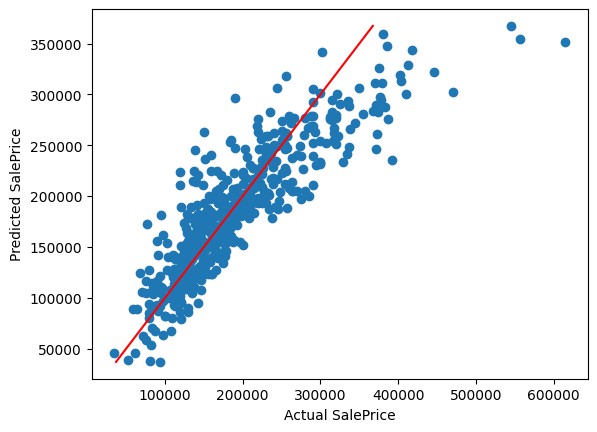

In [ ]:
# See how well our model performs on our test data
y_pred = myfit3.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [ ]:
list(zip(y_test,y_pred))[:10]

[(112000, np.float64(109985.87448055405)),
 (316500, np.float64(253927.51569748978)),
 (163990, np.float64(148324.86039775924)),
 (132000, np.float64(134775.6176920251)),
 (105000, np.float64(99818.10822526675)),
 (124500, np.float64(125374.90840651526)),
 (201800, np.float64(202420.80901368355)),
 (235128, np.float64(240057.08439589193)),
 (312500, np.float64(278211.85263220576)),
 (219500, np.float64(263424.8069142652))]

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 41017.93001679393


In [ ]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 43116.37974139201


## Residual Analysis

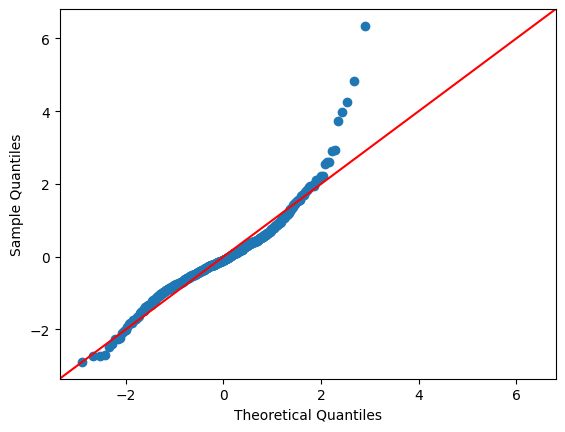

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

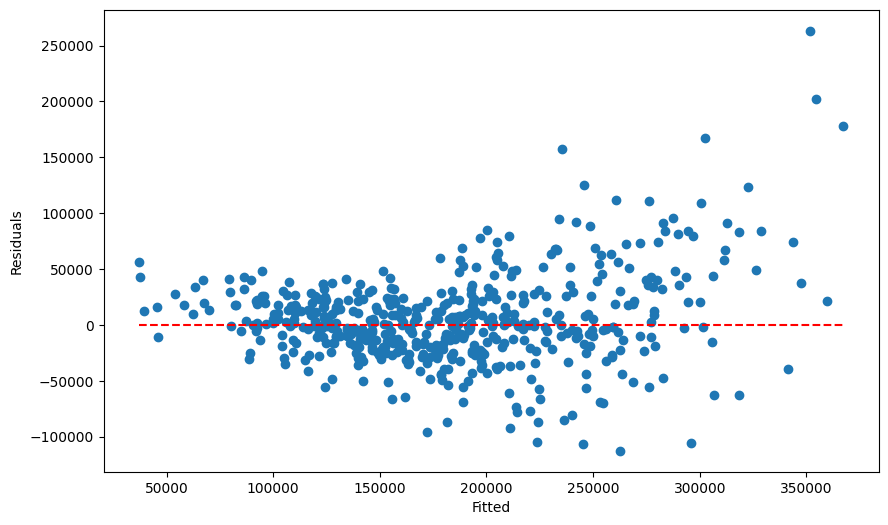

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

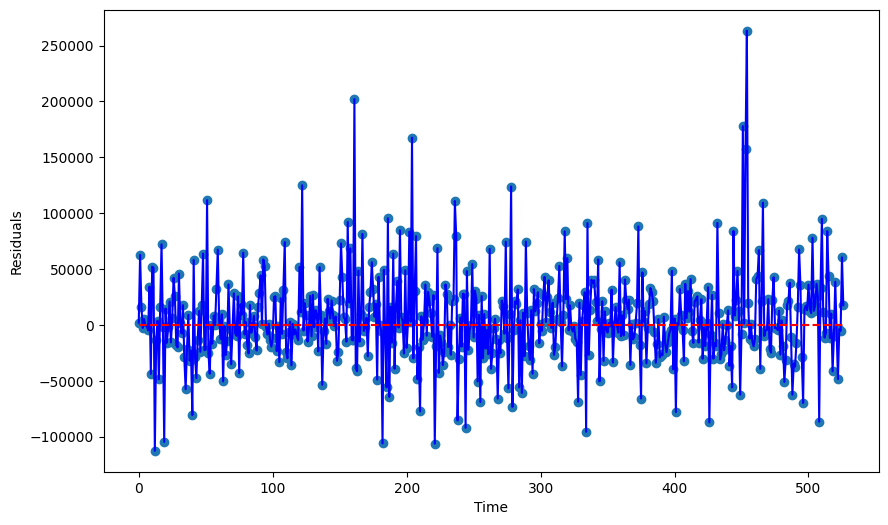

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;